In [1]:
# random_forest_sklearn.py

import pandas as pd
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset (you can replace this with pd.read_csv if needed)
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Accuracy Score: 1.0


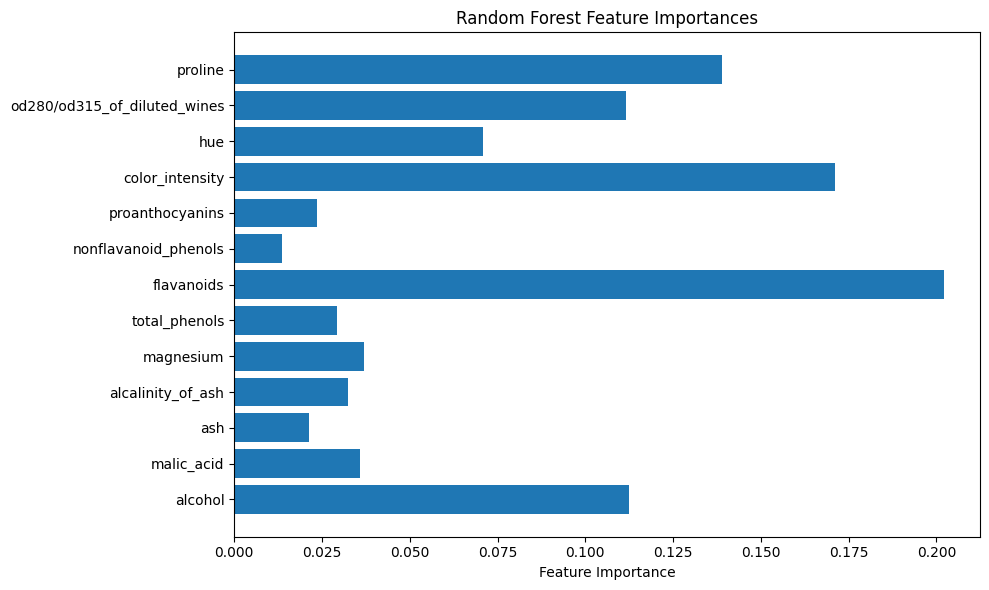

In [2]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


In [3]:
# random_forest_manual.py

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from collections import Counter

# Load dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameters
n_trees = 10
max_features = int(np.sqrt(X_train.shape[1]))  # sqrt(num_features)

# List to store decision tree models
forest = []

# Bootstrapped training and tree building
for i in range(n_trees):
    # Bootstrap sampling
    bootstrap_indices = np.random.choice(range(len(X_train)), size=len(X_train), replace=True)
    X_sample = X_train.iloc[bootstrap_indices]
    y_sample = y_train.iloc[bootstrap_indices]

    # Select random subset of features
    selected_features = np.random.choice(X.columns, size=max_features, replace=False)

    # Train Decision Tree on sampled data
    tree = DecisionTreeClassifier()
    tree.fit(X_sample[selected_features], y_sample)

    # Store the model and features
    forest.append((tree, selected_features))

# Predict using majority voting
def predict_forest(forest, X):
    predictions = []
    for tree, features in forest:
        preds = tree.predict(X[features])
        predictions.append(preds)

    # Transpose and majority vote
    final_preds = []
    for i in range(len(X)):
        votes = [pred[i] for pred in predictions]
        final_preds.append(Counter(votes).most_common(1)[0][0])

    return final_preds

# Make predictions
y_pred = predict_forest(forest, X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[14  0  0]
 [ 1 13  0]
 [ 0  0  8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36


Accuracy Score: 0.9722222222222222
